In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import unicodedata
import re

In [0]:
stopwords = ['pra', 'pro','to', 'ta','de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'a', 'com', 'nao', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'a', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'ha', 'nos', 'ja', 'esta', 'eu', 'tambam', 'sa3', 'pelo', 'pela', 'ata', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estao', 'vocaa', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'a s', 'minha', 'taam', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'sera', 'na3s', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocaas', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 
'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'esta', 'estamos', 'estao', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estavamos', 'estavam', 'estivera', 'estivaramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivassemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'ha', 'havemos', 'hao', 'houve', 'houvemos', 'houveram', 'houvera', 'houvaramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvassemos', 'houvessem', 'houver', 'houvermos', 'houverem', 'houverei', 'houvera', 'houveremos', 'houverao', 'houveria', 'houveraamos', 'houveriam', 'sou', 'somos', 'sao', 'era', 'aramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fa ramos', 'seja', 'sejamos', 'sejam', 'fosse', 'fa ssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'sera', 'seremos', 'serao', 'seria', 'seraamos', 'seriam', 'tenho', 'tem', 'temos', 'tam', 'tinha', 'tanhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivaramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivassemos', 'tivessem', 'tiver', 'tivermos', 'tiverem', 'terei', 'tera', 'teremos', 'terao', 'teria', 'teraamos', 'teriam']

In [0]:
fileWords = open('C:\\Users\\Raissa\\analise\\PROJETO\\2019\\Antigos\\word_keys.txt', "r") 
word_key = fileWords.readlines()

In [0]:
df = pd.read_csv(f'C:\\Users\\Raissa\\analise\\PROJETO\\2019\\Atualizados\\CSV\\{word_key[0].rstrip()}.csv')

#dataFrameDatas.head()
for i in word_key[1:]:

    i = i.rstrip()
    df = df.append(pd.read_csv(f'C:\\Users\\Raissa\\analise\\PROJETO\\2019\\Atualizados\\CSV\\{i}.csv'))

df.shape

(74562, 8)

In [0]:
df.head()

,favorite_count,source,text,in_reply_to_screen_name,is_retweet,created_at,retweet_count,id_str
0,3,Twitter for iPhone,#tiraamaodomeuif #TiraAMaoDaMinhaFederal #Tira...,NaN,False,Fri May 10 11:40:32 +0000 2019,0,1126814273693462530
1,0,Twitter Web App,Que coisa linda! #TsunamiDaEducação #TiraAMãoD...,NaN,False,Wed May 15 14:04:59 +0000 2019,0,1128662564685144064
2,1,Twitter Web App,"@MEC_Comunicacao Com ""últimos"" eles estão quer...",MEC_Comunicacao,False,Thu May 16 13:03:14 +0000 2019,0,1129009411060576259
3,0,Twitter for Android,#hojeediadeluta\r\n#tiraamaodomeuif #TiraAMaoD...,NaN,False,Wed May 15 08:24:32 +0000 2019,0,1128576887150845952
4,0,Twitter Web Client,"Para quem não assistiu ontem, entenda bem dire...",NaN,False,Tue May 14 15:52:32 +0000 2019,0,1128327243430805505


In [0]:
df.tail()

,favorite_count,source,text,in_reply_to_screen_name,is_retweet,created_at,retweet_count,id_str
11303,0,Twitter for Android,que orgulho dó povo dos dois ifes da minha cid...,NaN,False,Wed May 15 18:26:02 +0000 2019,0,1128728261553471489
11304,269,Twitter Web Client,"Os estudantes, professores e trabalhadores, re...",NaN,False,Wed May 15 22:16:25 +0000 2019,66,1128786237786066944
11305,2,Twitter for Android,#NaRuaPelaEducação\r\n#TsunamiDaEducacao\r\n#B...,NaN,False,Thu May 30 23:05:28 +0000 2019,0,1134234397597741056
11306,23,Twitter for Android,#30MpelaEducacao\r\nHoje a aula é na RUA!\r\n\...,NaN,False,Thu May 30 11:38:10 +0000 2019,13,1134061434856493058
11307,4,Twitter for Android,#todospelaeducação #TsunamiDaEducação #15M #Na...,NaN,False,Wed May 15 22:26:59 +0000 2019,1,1128788897536905217


In [0]:
df = df.drop(columns=['favorite_count','source','in_reply_to_screen_name','is_retweet','created_at',
                              'retweet_count','id_str'])
df.head()

,text
0,#tiraamaodomeuif #TiraAMaoDaMinhaFederal #Tira...
1,Que coisa linda! #TsunamiDaEducação #TiraAMãoD...
2,"@MEC_Comunicacao Com ""últimos"" eles estão quer..."
3,#hojeediadeluta\r\n#tiraamaodomeuif #TiraAMaoD...
4,"Para quem não assistiu ontem, entenda bem dire..."


In [0]:
df_predict = pd.read_csv(f'C:\\Users\\Raissa\\analise\\PROJETO\\2020\\dataPredict.csv')
df['sentimento'] = df_predict['predicao']
df.head()

,text,sentimento
0,#tiraamaodomeuif #TiraAMaoDaMinhaFederal #Tira...,0
1,Que coisa linda! #TsunamiDaEducação #TiraAMãoD...,1
2,"@MEC_Comunicacao Com ""últimos"" eles estão quer...",0
3,#hojeediadeluta\r\n#tiraamaodomeuif #TiraAMaoD...,0
4,"Para quem não assistiu ontem, entenda bem dire...",0


## Limpando os dados

In [0]:
def limpeza_dados(tuites, text_field):
    tuites[text_field] = tuites[text_field].str.lower()
    tuites[text_field] = tuites[text_field].str.replace(r"#", " ") #remove hashtags
    tuites[text_field] = tuites[text_field].str.replace(r"http", " ")
    tuites[text_field] = tuites[text_field].str.replace(r"http\S+", " ")
    tuites[text_field] = tuites[text_field].str.replace(r"@", "at")
    tuites[text_field] = tuites[text_field].str.replace(r"\n", " ") #remove as linhas em branco
    return tuites

def remove_stopWords(sentence):
    frase = []
    for word in sentence.split():
        if word not in stopwords:
           # semStop = [p for p in word.split() if p not in stopwords]
            frase.append(word)
    return ' '.join(frase)

def removerAcentosECaracteresEspeciais(palavra):

    nfkd = unicodedata.normalize('NFKD', palavra)
    palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])
    palavraSemAcento = re.sub('[^a-zA-Z0-9 \\\]', '', palavraSemAcento)

    return palavraSemAcento

In [0]:
X = df["text"].values.astype('U')
y = df["sentimento"].values.astype('U')

In [0]:
df_limpo = limpeza_dados(df, "text")

In [0]:
df['text'] = [remove_stopWords(str(t)) for t in df['text']]

In [0]:
df['text'] = [removerAcentosECaracteresEspeciais(str(t)) for t in df['text']]

In [0]:
df_limpo.to_csv("dados_limpos.csv")
df_limpo.head()

,text,sentimento
0,tiraamaodomeuif tiraamaodaminhafederal tiraama...,0
1,coisa linda tsunamidaeducacao tiraamaodomeuif ...,1
2,atmeccomunicacao ultimos estao querendo dizer ...,0
3,hojeediadeluta tiraamaodomeuif tiraamaodaminha...,0
4,nao assistiu ontem entenda bem direitinho cort...,0


## Df / sentimento

In [0]:
df_neg = df.query('sentimento < 0 ')
df_neg

,text,sentimento
56,estudantes ruas lutando educacao que e direito...,-1
64,manter poder trump tropicos nao pode investir ...,-1
77,ataques governo bolsonaro poem risco estudos l...,-1
103,educacao nunca despesa if transforma vida cada...,-1
116,reunidos abraco instituto federal brasilia def...,-1
...,...,...
11262,forabolsonaro naruapelaeducacao tsunamidaeduca...,-1
11265,blog sobre desgoverno bolsonaro leiam comentem...,-1
11278,tsunamidaeducacao naruapelaeducacao 15m levant...,-1
11284,bolsonaro cortando 40 orcamento educacao liber...,-1


In [0]:
negativos = df_neg.drop(columns=['sentimento'])

In [0]:
negativos

,text
56,estudantes ruas lutando educacao que e direito...
64,manter poder trump tropicos nao pode investir ...
77,ataques governo bolsonaro poem risco estudos l...
103,educacao nunca despesa if transforma vida cada...
116,reunidos abraco instituto federal brasilia def...
...,...
11262,forabolsonaro naruapelaeducacao tsunamidaeduca...
11265,blog sobre desgoverno bolsonaro leiam comentem...
11278,tsunamidaeducacao naruapelaeducacao 15m levant...
11284,bolsonaro cortando 40 orcamento educacao liber...


In [0]:
negativos.to_csv("negativos.csv")

In [0]:
df_pos = df.query('sentimento > 0')
df_pos

,text,sentimento
1,coisa linda tsunamidaeducacao tiraamaodomeuif ...,1
8,cara so orgulho tiraamaodaminhafederal tiraam...,1
14,convite feito tiraamaodaminhafederal todospela...,1
16,balburdia e ver filho pobre virando doutor man...,1
21,dia 30m luta continua tiraamaodomeuif tiraamao...,1
...,...,...
11074,melhor brasil sao brasileiros amo pais povo or...,1
11082,idiotasinuteis tsunamidaeducacao naruapelaeduc...,1
11106,hoje e dia lutar preservacao educacao poder pe...,1
11160,cabo santo agostinho manifestacoes comecaram c...,1


In [0]:
positivos = df_pos.drop(columns=['sentimento'])
positivos

,text
1,coisa linda tsunamidaeducacao tiraamaodomeuif ...
8,cara so orgulho tiraamaodaminhafederal tiraam...
14,convite feito tiraamaodaminhafederal todospela...
16,balburdia e ver filho pobre virando doutor man...
21,dia 30m luta continua tiraamaodomeuif tiraamao...
...,...
11074,melhor brasil sao brasileiros amo pais povo or...
11082,idiotasinuteis tsunamidaeducacao naruapelaeduc...
11106,hoje e dia lutar preservacao educacao poder pe...
11160,cabo santo agostinho manifestacoes comecaram c...


In [0]:
positivos.to_csv('positivos.csv')

In [0]:
df_neutro = df.query('sentimento == 0')
df_neutro

,text,sentimento
0,tiraamaodomeuif tiraamaodaminhafederal tiraama...,0
2,atmeccomunicacao ultimos estao querendo dizer ...,0
3,hojeediadeluta tiraamaodomeuif tiraamaodaminha...,0
4,nao assistiu ontem entenda bem direitinho cort...,0
5,atbolsonarosp tiraamaodomeuif tiraamaodaminhaf...,0
...,...,...
11303,orgulho do povo dois ifes cidade indo protesta...,0
11304,estudantes professores trabalhadores reuniram ...,0
11305,naruapelaeducacao tsunamidaeducacao brasilpela...,0
11306,30mpelaeducacao hoje aula e rua naruapelaeduca...,0


In [0]:
neutros = df_neutro.drop(columns=['sentimento'])
neutros

,text
0,tiraamaodomeuif tiraamaodaminhafederal tiraama...
2,atmeccomunicacao ultimos estao querendo dizer ...
3,hojeediadeluta tiraamaodomeuif tiraamaodaminha...
4,nao assistiu ontem entenda bem direitinho cort...
5,atbolsonarosp tiraamaodomeuif tiraamaodaminhaf...
...,...
11303,orgulho do povo dois ifes cidade indo protesta...
11304,estudantes professores trabalhadores reuniram ...
11305,naruapelaeducacao tsunamidaeducacao brasilpela...
11306,30mpelaeducacao hoje aula e rua naruapelaeduca...


In [0]:
neutros.to_csv('neutros.csv')

## Gerando as nuvens de palavras

In [0]:
pyimg_mask = np.array(Image.open("C:\\Users\\Raissa\\analise\\pyimg.png"))
pyimg_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [0]:
text_positivos = open('C:\\Users\\Raissa\\projetos\\positivos.csv', 'r').read()

In [0]:
text_negativos = open('C:\\Users\\Raissa\\projetos\\negativos.csv', 'r').read()

In [0]:
text_neutros = open('C:\\Users\\Raissa\\projetos\\neutros.csv', 'r').read()

In [0]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

transformed_pyimg_mask = np.ndarray((pyimg_mask.shape[0], 
                                     pyimg_mask.shape[1]), np.int32) 

for i in range(len(pyimg_mask)):
    transformed_pyimg_mask[i] = list(map(transform_format, pyimg_mask[i]))
    
transformed_pyimg_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [0]:
wordcloud_neutros = WordCloud(stopwords = stopwords, max_font_size = 100, background_color = 'white',
                   mask = transformed_pyimg_mask)

In [0]:
wordcloud_neutros.generate(text_neutros)

In [0]:
wordcloud_positivos = WordCloud(stopwords = stopwords, max_font_size = 100, background_color = 'white',
                   mask = transformed_pyimg_mask)

In [0]:
wordcloud_positivos.generate(text_positivos)

In [0]:
wordcloud_negativos = WordCloud(stopwords = stopwords, max_font_size = 100, background_color = 'white',
                   mask = transformed_pyimg_mask)

In [0]:
wordcloud_negativos.generate(text_negativos)

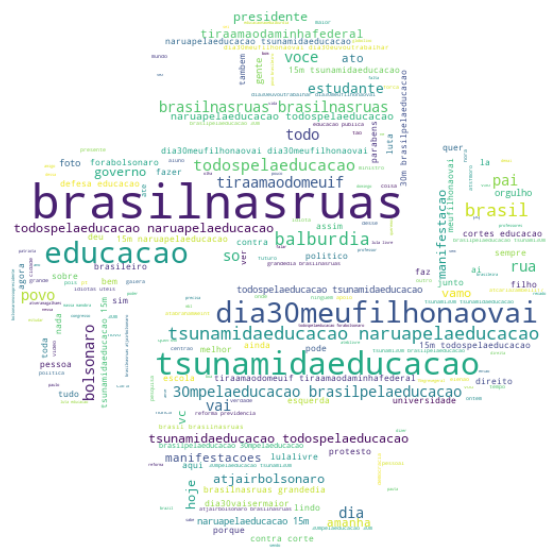

In [0]:
plt.figure(figsize = [20, 10])
plt.imshow(wordcloud_positivos, interpolation="bilinear")
plt.axis("off") #para não mostrar os eixos do gráfico
plt.show()

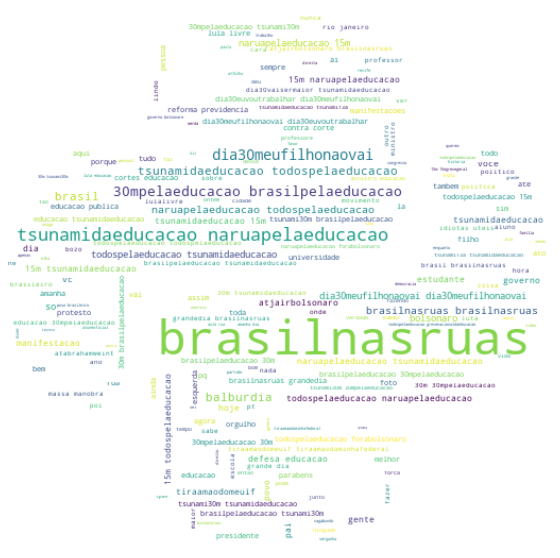

In [0]:
plt.figure(figsize = [20, 10])
plt.imshow(wordcloud_neutros, interpolation="bilinear")
plt.axis("off") #para não mostrar os eixos do gráfico
plt.show()

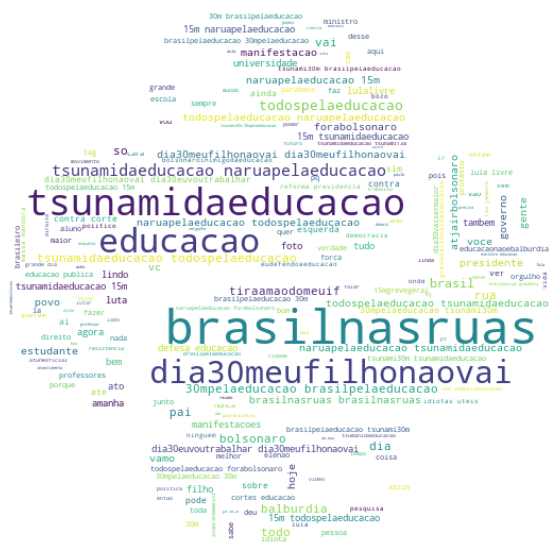

In [0]:
plt.figure(figsize = [20, 10])
plt.imshow(wordcloud_negativos, interpolation="bilinear")
plt.axis("off") #para não mostrar os eixos do gráfico
plt.show()